## Goal:

 - Upload an image, detect objects with YOLOv8 model, then classify it.
 - Accuracy over speed priority.
 - The model should choose between:
   - Recycle - metal, rigid plastic, glass, paper
   - Compost - food & yard waste
   - Store Drop-off - flexible film plastics
   - Landfill/other - default fallback

In [1]:
from ultralytics import YOLO
import os
import yaml
import json

In [2]:
model = YOLO("yolov8x.pt")

coco_names = model.names

recycle = {
    "bottle", "wine glass", "cup", "bowl",
    "fork", "knife", "spoon",
    "vase", "chair", "bench", 
    "laptop", "mouse", "keyboard", "cell phone", 
}

compost = {
    "banana", "apple", "orange", "broccoli", "carrot",
    "pizza", "donut", "cake", "sandwich", "hot dog",
}

store_dropoff = {
    "handbag", "backpack", "umbrella" #commonly made out of flexible plastics or films
}

default_route = "Landfill / Check rules"

coco_to_bin = {}
for idx, name in coco_names.items():
    if name in recycle:
        coco_to_bin[name] = "Recycle"
    elif name in compost:
        coco_to_bin[name] = "Compost"
    elif name in store_dropoff:
        coco_to_bin[name] = "Store Drop-off"
    else:
        coco_to_bin[name] = default_route

print("Sample of mapping:", dict(list(coco_to_bin.items())[:12]))

Sample of mapping: {'person': 'Landfill / Check rules', 'bicycle': 'Landfill / Check rules', 'car': 'Landfill / Check rules', 'motorcycle': 'Landfill / Check rules', 'airplane': 'Landfill / Check rules', 'bus': 'Landfill / Check rules', 'train': 'Landfill / Check rules', 'truck': 'Landfill / Check rules', 'boat': 'Landfill / Check rules', 'traffic light': 'Landfill / Check rules', 'fire hydrant': 'Landfill / Check rules', 'stop sign': 'Landfill / Check rules'}


In [3]:
import cv2, matplotlib.pyplot as plt, numpy as np
def show_cv(img_bgr, size=(7,5)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()

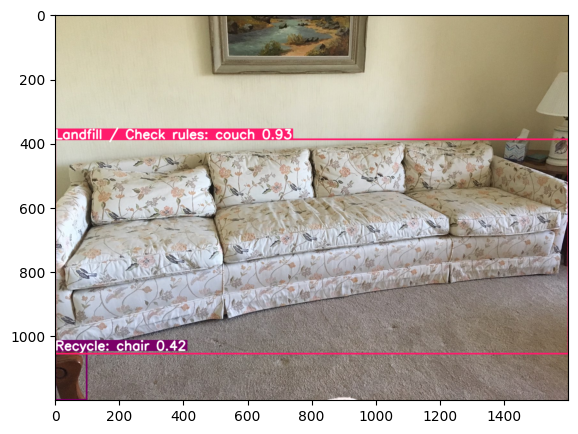

In [ ]:
def predict_image(path, conf=0.25, imgsz=640):
    res = model.predict(path, conf=conf, imgsz=imgsz, verbose=False)
    if not res:
        print("No detections")
        return
    r = res[0]
    # convert each detection label to disposal route
    for box in r.boxes:
        cls = int(box.cls[0])
        orig_name = r.names[cls]
        disp = coco_to_bin.get(orig_name, default_route)
        # override label so r.plot writes route (plus original name)
        r.names[cls] = f"{disp}: {orig_name}"
    annotated = r.plot()
    # inline display
    show_cv(annotated)
    
predict_image("../test_imgs/sofa.jpeg")